In [3]:
# Se importan las librerias y csv.
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv("data/ML_cars.csv")

In [4]:
dq=pd.DataFrame(df)
dq.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

### Gestión de nulos y formato a tipos de varibles

In [82]:
# Se gestiona nulos. "No se evidencian nulls"

nulls= list(dq.isnull().sum().sort_values(ascending=False))
nulls

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [83]:
# Se valida el tipo de datos en el dataframe

dq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# doornumber, se cambia a variable numerica

dq.insert(5, 'doornumber1', dq['doornumber'].apply(lambda x: 2 if  x=="two"  else(4 if x=="four" else x)))
dq.drop(['doornumber'], axis=1, inplace= True)
dq.rename(columns={'doornumber1':'doornumber'}, inplace=True)

### Outliers

In [10]:
# Se selecciona las variables numericas para graficar y ver la distribución de las variables

var_num=dq.select_dtypes('number').drop(['car_ID'], axis=1)

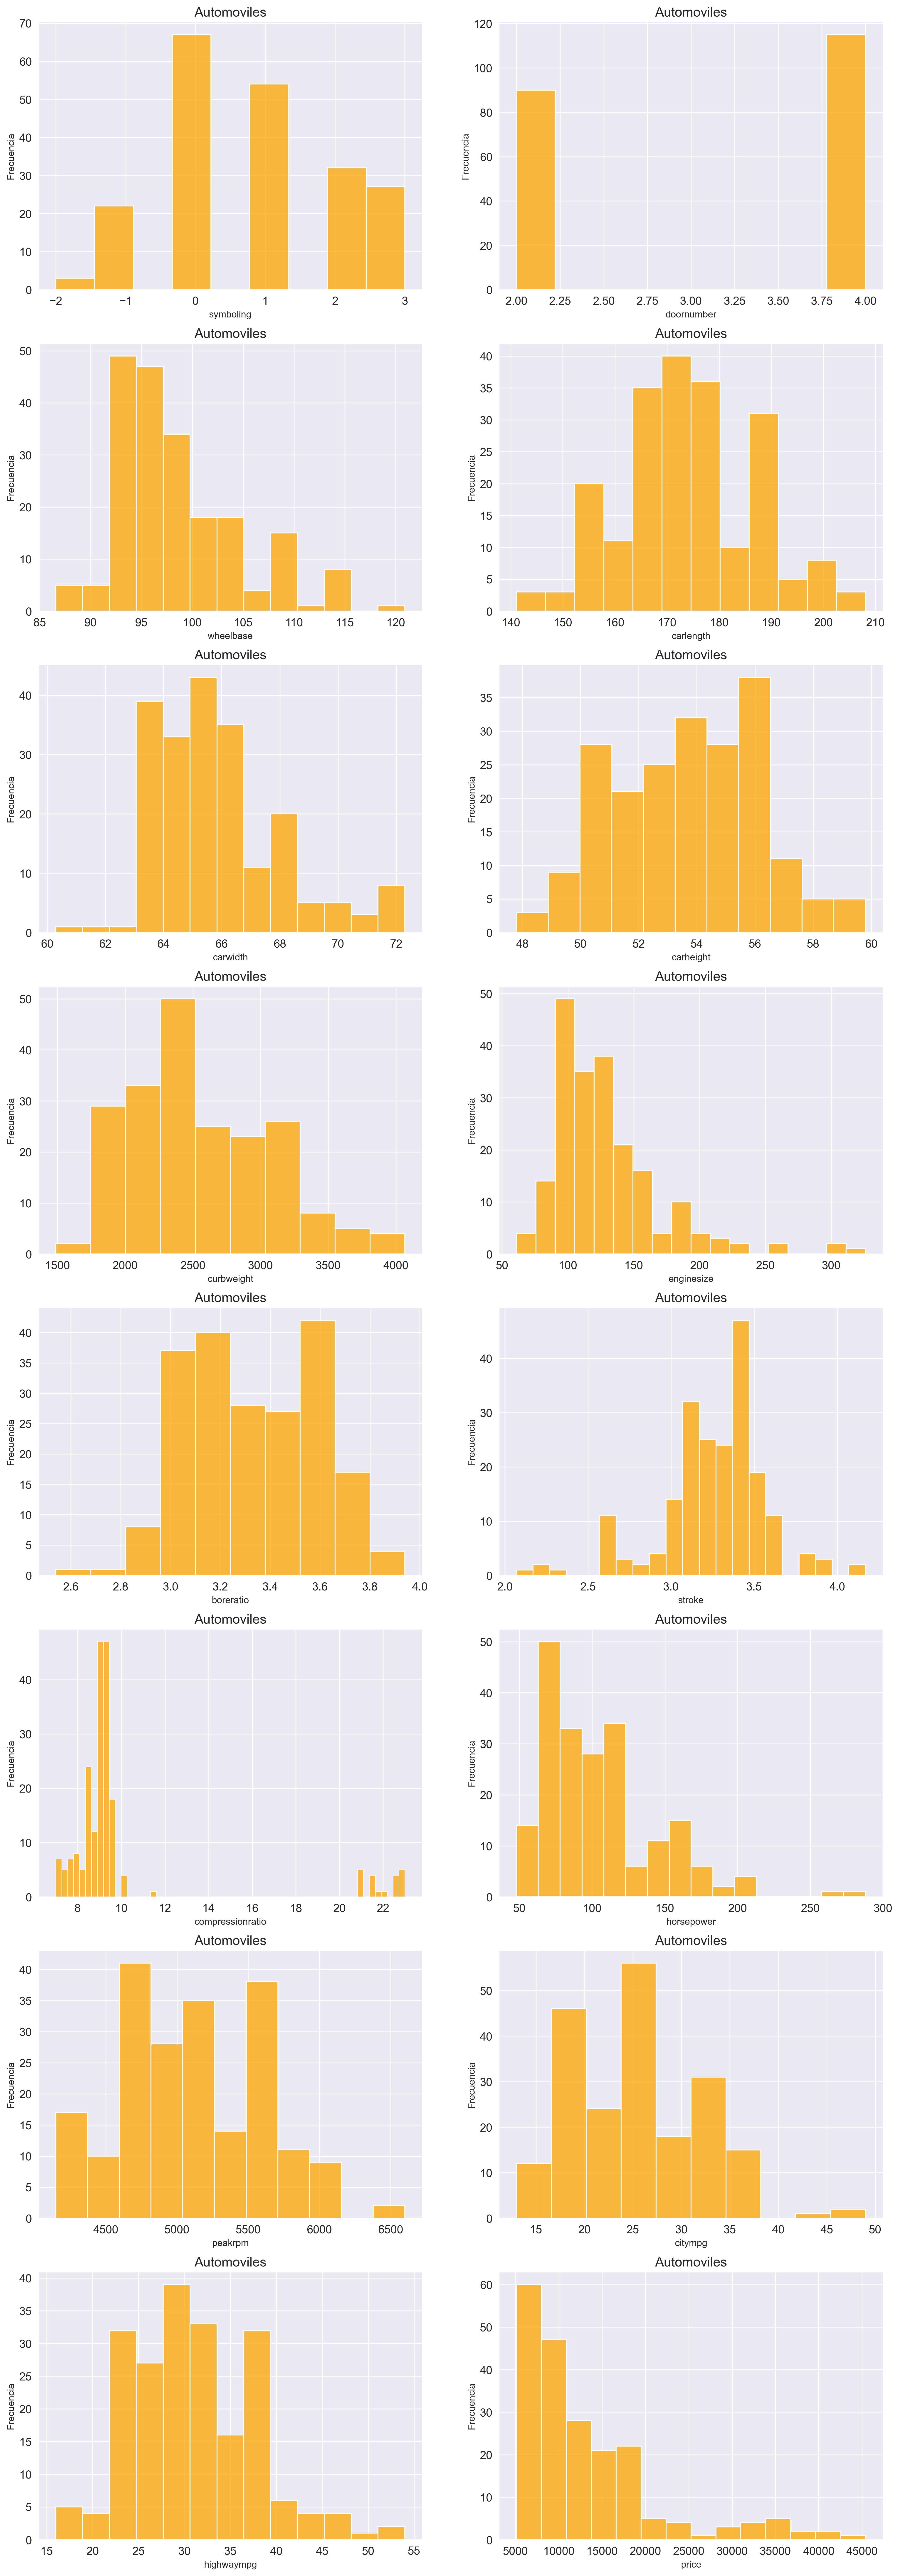

In [12]:
sns.set_style("darkgrid") # Formato para el Backgound del grafico.

def graficos_eda_num(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    # Se define los ejes del gráfico
    
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6),dpi=300)

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    
    for a, variable in enumerate(cat):

        sns.histplot(data=cat,x=cat[variable],color="orange",ax=ax[a])
        ax[a].set_title( "Automoviles", fontsize = 14)
        ax[a].tick_params(labelsize = 12)
        ax[a].set_ylabel('Frecuencia')
 
graficos_eda_num(var_num)

In [15]:
# Metodologia 3sixma para outliers

sample=dq.drop(['car_ID'], axis=1)

sample_out = sample.describe().T
sample_out['outlier_min']= sample.mean() -( 3 *sample.std())
sample_out['outlier_max']= sample.mean() +( 3 *sample.std())

sample_out    

C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_23748\2028657740.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sample_out['outlier_min']= sample.mean() -( 3 *sample.std())
C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_23748\2028657740.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sample_out['outlier_max']= sample.mean() +( 3 *sample.std())


,count,mean,std,min,25%,50%,75%,max,outlier_min,outlier_max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00,-2.901774,4.570067
doornumber,205.0,3.121951,0.994966,2.00,2.00,4.00,4.00,4.00,0.137054,6.106849
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90,80.691258,116.821912
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10,137.037403,211.061134
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30,59.472193,72.343416
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80,46.394312,61.055444
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00,993.525243,4117.606464
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00,1.979237,251.835397
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94,2.517225,4.142287
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17,2.314624,4.196206


In [17]:
# Variables Categoricas

var_cat=dq.select_dtypes('O').drop(['CarName'], axis=1)

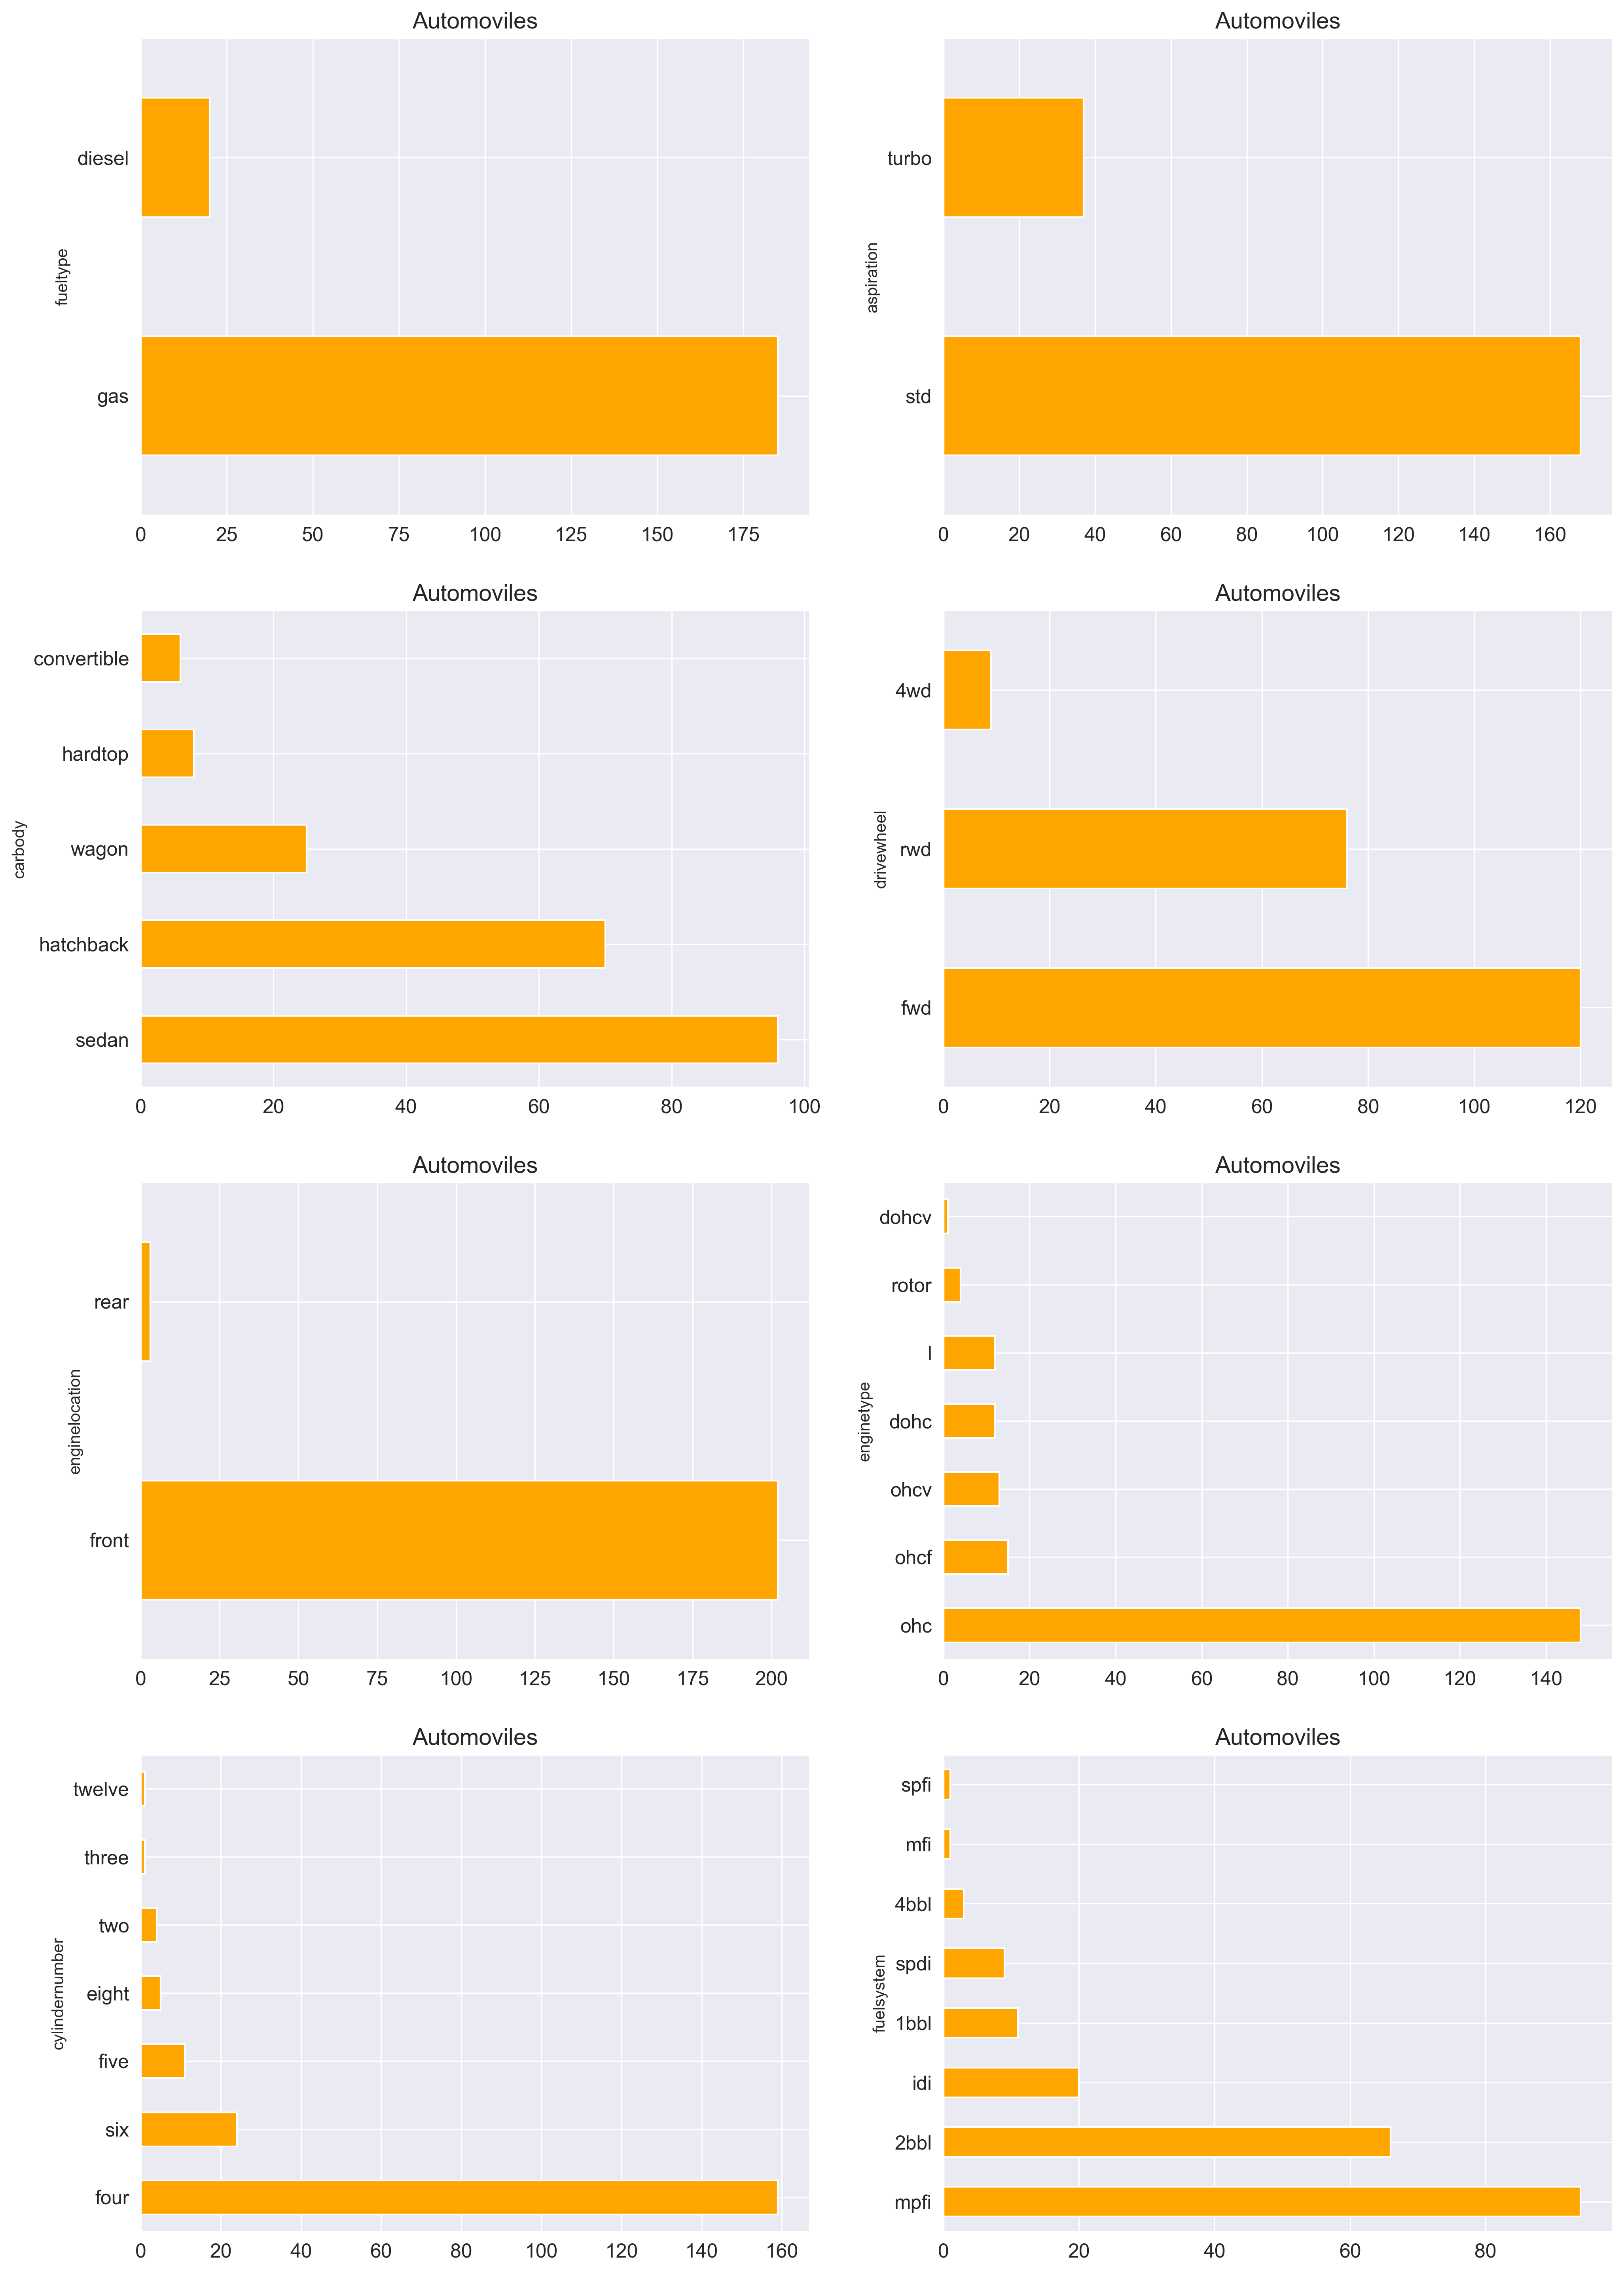

In [19]:
def graficos_eda_cat(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6),dpi=300)

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    
    for a, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[a], color="orange")
        ax[a].set_title('Automoviles', fontsize = 14)
        ax[a].tick_params(labelsize = 12)
        ax[a].set_ylabel(variable)
        
graficos_eda_cat(var_cat)  

### Correlación de variables

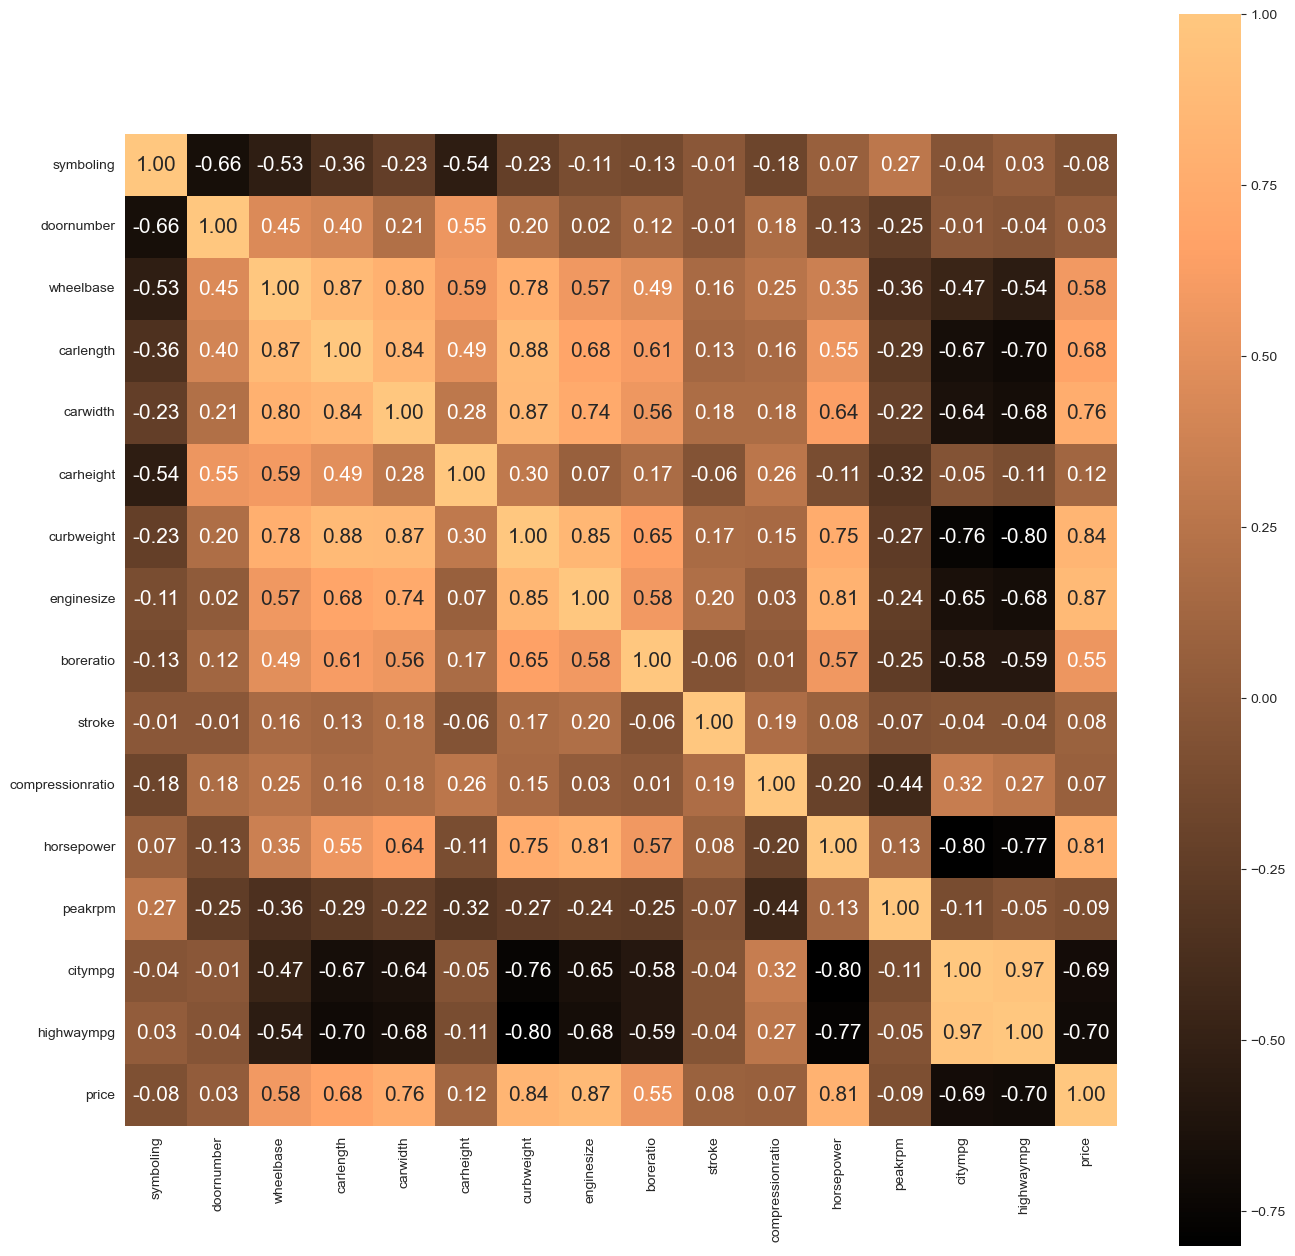

In [18]:
# Matriz de correlacion

corr = var_num.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, xticklabels= var_num.columns, 
           yticklabels= var_num.columns, cmap= 'copper')
plt.show()